In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import zipfile
import io
import scipy.misc
import numpy as np

import glob
import imageio
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

try:
  
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
tf.get_logger().setLevel('ERROR')

##Data Preprocessing

In [ ]:
!git clone --depth 1 https://github.com/tensorflow/models/

Cloning into 'models'...
remote: Enumerating objects: 3207, done.
remote: Counting objects: 100% (3207/3207), done.
remote: Compressing objects: 100% (2708/2708), done.
remote: Total 3207 (delta 860), reused 1384 (delta 455), pack-reused 0
Receiving objects: 100% (3207/3207), 33.40 MiB | 24.50 MiB/s, done.
Resolving deltas: 100% (860/860), done.


In [ ]:
# install the Object Detection API
!cd models/research/ && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install .

Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 9.8 MB 8.4 MB/s 
     |████████████████████████████████| 352 kB 44.4 MB/s 
     |████████████████████████████████| 1.8 MB 23.2 MB/s 
     |████████████████████████████████| 22.7 MB 1.6 MB/s 
     |████████████████████████████████| 4.9 MB 34.7 MB/s 
     |████████████████████████████████| 47.6 MB 1.8 MB/s 
     |████████████████████████████████| 90 kB 9.3 MB/s 
     |████████████████████████████████| 213 kB 49.7 MB/s 
     |████████████████████████████████| 596 kB 44.9 MB/s 
     |████████████████████████████████| 99 kB 8.7

In [ ]:
# import the label map utility module
from object_detection.utils import label_map_util 

# import module for reading and updating configuration files.
from object_detection.utils import config_util 

# import module for visualization. use the alias `viz_utils`
from object_detection.utils import visualization_utils as viz_utils 

# import module for building the detection model
from object_detection.builders import model_builder 

# import module for utilities in Colab
from object_detection.utils import colab_utils

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
    path: a file path.

    Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
    """
    
    img_data = tf.io.gfile.GFile(path, 'rb').read()
    image = Image.open(BytesIO(img_data))
    (im_width, im_height) = image.size
    
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)


def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
    """Wrapper function to visualize detections.

    Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
          and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
          this function assumes that the boxes to be plotted are groundtruth
          boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
          category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
    """
    
    image_np_with_annotations = image_np
    
    viz_utils.visualize_boxes_and_labels_on_image_array(
        image_np_with_annotations,
        boxes,
        classes,
        scores,
        category_index,
        use_normalized_coordinates=True,
        min_score_thresh=0.8)
    
    if image_name:
        plt.imsave(image_name, image_np_with_annotations)
    
    else:
        plt.imshow(image_np_with_annotations)


In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
# unzip to a local directory
local_zip = '/drive/My Drive/Train_Images.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./training')
zip_ref.close()

In [ ]:
import pandas as pd
url='/content/Train.csv'
train=pd.read_csv(url)

In [ ]:
train.head()

,Image_ID,class,xmin,ymin,width,height
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0


/content/training/Train_Images/ID_007FAIEI.jpg
/content/training/Train_Images/ID_00G8K1V3.jpg
/content/training/Train_Images/ID_00WROUT9.jpg
/content/training/Train_Images/ID_00ZJEEK3.jpg
/content/training/Train_Images/ID_018UIENR.jpg
/content/training/Train_Images/ID_01QZDXVQ.jpg
/content/training/Train_Images/ID_02PX7GI8.jpg
/content/training/Train_Images/ID_02PX7GI8.jpg
/content/training/Train_Images/ID_03WE3EVQ.jpg
/content/training/Train_Images/ID_052XYWUM.jpg
/content/training/Train_Images/ID_055U1LPM.jpg
/content/training/Train_Images/ID_058OQ45J.jpg
/content/training/Train_Images/ID_05A7I1ZP.jpg
/content/training/Train_Images/ID_05A7I1ZP.jpg
/content/training/Train_Images/ID_05G9F711.jpg
/content/training/Train_Images/ID_05R05ZLJ.jpg
/content/training/Train_Images/ID_05V8XX4L.jpg
/content/training/Train_Images/ID_05V8XX4L.jpg
/content/training/Train_Images/ID_06EXUMWA.jpg
/content/training/Train_Images/ID_06GLI7SR.jpg
/content/training/Train_Images/ID_06KI6V1N.jpg
/content/trai

ValueError: ignored

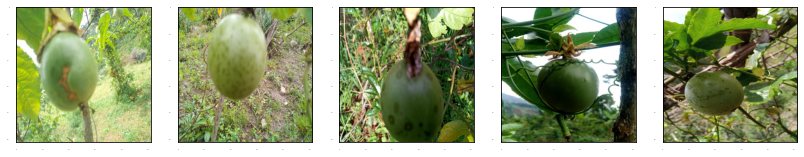

In [ ]:
%matplotlib inline



# assign the name (string) of the directory containing the training images
train_image_dir = './training'

# declare an empty list
train_images_np = [] 
gt_boxes = []
# run a for loop for each image
for i in range(60): 
    # define the path (string) for each image
    image_path = os.path.join('/content/training/Train_Images/' + train['Image_ID'][i] + '.jpg')
    print(image_path)
    gt_boxes.append(np.ndarray((1, 4), buffer=np.array([train['ymin'][i] / 512,train['xmin'][i] /512,
                                                        (train['height'][i] + train['ymin'][i])/512,
                                                        (train['width'][i] + train['xmin'][i])/512]),
                                            dtype=float))

    # load images into numpy arrays and append to a list
    train_images_np.append(load_image_into_numpy_array(image_path))




In [ ]:
gt_boxes

In [ ]:
# define a dictionary describing the zombie class
category_index = {1: {'id': 1, 'name': 'fruit_brownspot'},2 : {'id' : 2 , 'name':'fruit_healthy'} , 3 : {'id' : 3 , 'name' : 'fruit_woodiness'}}

# Specify the number of classes that the model will predict
num_classes =3

In [ ]:
for i in range(len(train)):
  if train['class'][i] == 'fruit_woodiness':
    train['class'][i] = 1
  elif train['class'][i] == 'fruit_brownspot':
    train['class'][i] = 2
  else : train['class'][i] = 3
train['class']=train['class'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
train['class'][1:6]

1    2
2    2
3    3
4    2
5    1
Name: class, dtype: int64

In [ ]:
# The `label_id_offset` here shifts all classes by a certain number of indices;
# we do this here so that the model receives one-hot labels where non-background
# classes start counting at the zeroth index.  This is ordinarily just handled
# automatically in our training binaries, but we need to reproduce it here.

label_id_offset = 1
train_image_tensors = []

# lists containing the one-hot encoded classes and ground truth boxes
gt_classes_one_hot_tensors = []
gt_box_tensors = []
Compteur = 1
for (train_image_np, gt_box_np) in zip(train_images_np, gt_boxes):
    
    # convert training image to tensor, add batch dimension, and add to list
    train_image_tensors.append(tf.expand_dims(tf.convert_to_tensor(
        train_image_np, dtype=tf.float32), axis=0))
    
    # convert numpy array to tensor, then add to list
    gt_box_tensors.append(tf.convert_to_tensor(gt_box_np, dtype=tf.float32))
    
    # apply offset to to have zero-indexed ground truth classes
    zero_indexed_groundtruth_classes = tf.convert_to_tensor(
        np.array([train['class'][Compteur]], dtype=np.int32) - label_id_offset)
    Compteur += 1
    # do one-hot encoding to ground truth classes
    gt_classes_one_hot_tensors.append(tf.one_hot(
        zero_indexed_groundtruth_classes, num_classes))

print('Done prepping data.')

Done prepping data.


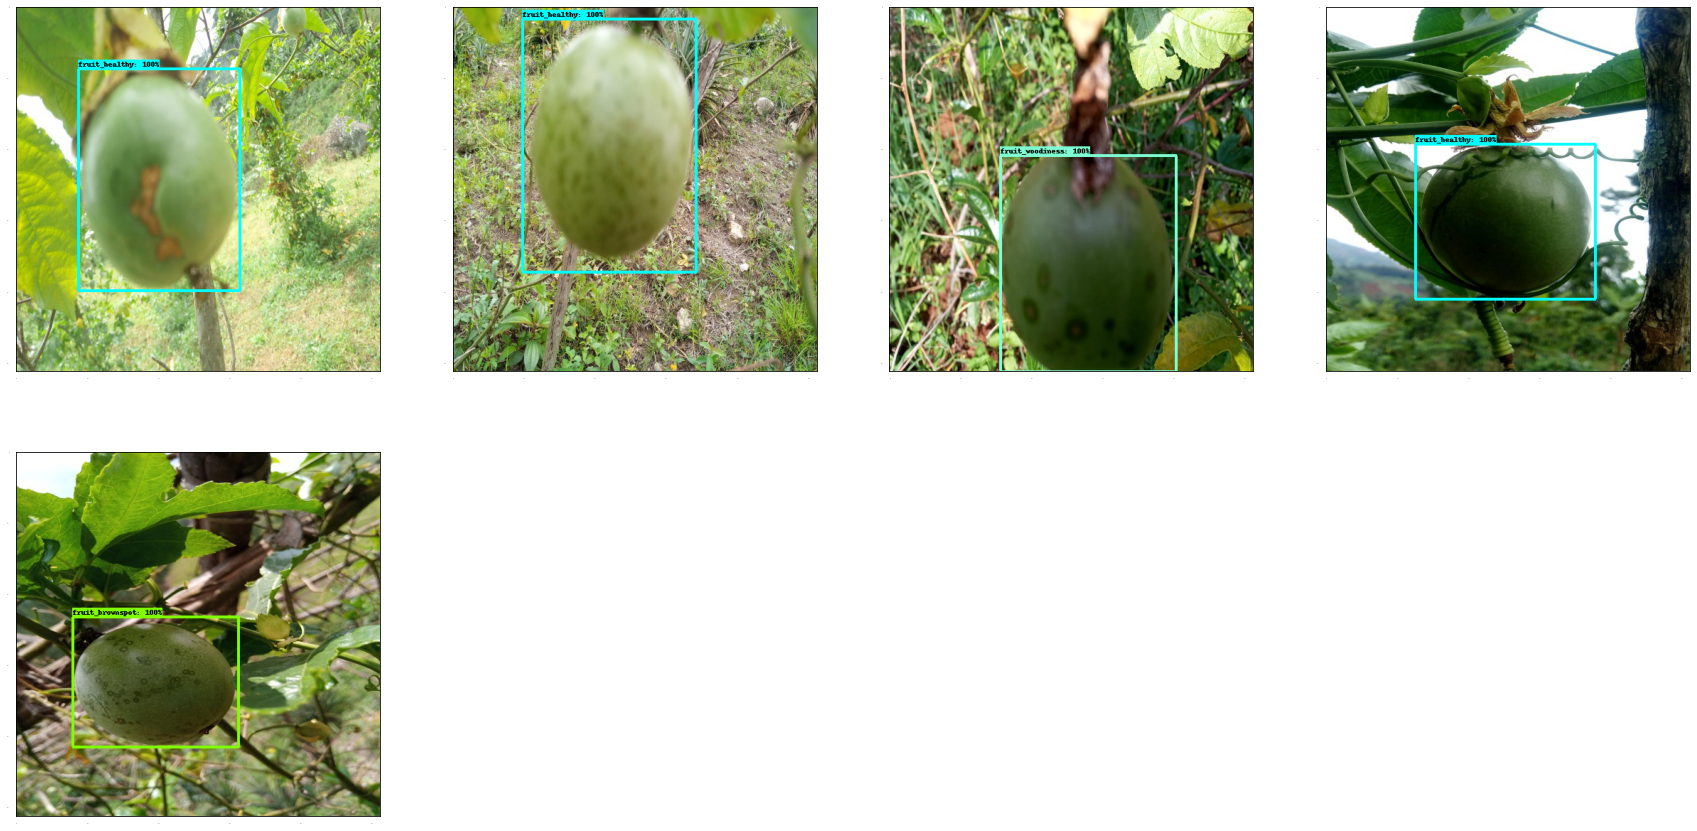

In [ ]:
# give boxes a score of 100%
dummy_scores = np.array([1], dtype=np.float32)

# define the figure size
plt.figure(figsize=(30, 15))

# use the `plot_detections()` utility function to draw the ground truth boxes
for idx in range(5):
    plt.subplot(2, 4, idx+1)
    plot_detections(
      train_images_np[idx],
      gt_boxes[idx],
      np.array([train['class'][idx + 1]], dtype=np.int32) ,
      dummy_scores, category_index)

plt.show()

#Build the Model

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
    
# untar (decompress) the tar file
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

# copy the checkpoint to the test_data folder models/research/object_detection/test_data/
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2021-12-09 19:24:20--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.121.128, 2607:f8b0:4001:c19::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.121.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   166MB/s    in 1.4s    

2021-12-09 19:24:21 (166 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



In [ ]:
mv --help

Usage: mv [OPTION]... [-T] SOURCE DEST
  or:  mv [OPTION]... SOURCE... DIRECTORY
  or:  mv [OPTION]... -t DIRECTORY SOURCE...
Rename SOURCE to DEST, or move SOURCE(s) to DIRECTORY.

Mandatory arguments to long options are mandatory for short options too.
      --backup[=CONTROL]       make a backup of each existing destination file
  -b                           like --backup but does not accept an argument
  -f, --force                  do not prompt before overwriting
  -i, --interactive            prompt before overwrite
  -n, --no-clobber             do not overwrite an existing file
If you specify more than one of -i, -f, -n, only the final one takes effect.
      --strip-trailing-slashes  remove any trailing slashes from each SOURCE
                                 argument
  -S, --suffix=SUFFIX          override the usual backup suffix
  -t, --target-directory=DIRECTORY  move all SOURCE arguments into DIRECTORY
  -T, --no-target-directory    treat DEST as a normal file
  -u, --u

In [ ]:
tf.keras.backend.clear_session()

# define the path to the .config file for ssd resnet 50 v1 640x640
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'

# Load the configuration file into a dictionary
configs = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# See what configs looks like
configs

'models/research/object_detection/test_data/checkpoint/ckpt-0'

In [ ]:

# Read in the object stored at the key 'model' of the configs dictionary
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']

# see what model_config looks like
model_config

ssd {
  num_classes: 90
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: f

In [ ]:
# Modify the number of classes from its default of 90
model_config.ssd.num_classes = num_classes

# Freeze batch normalization
model_config.ssd.freeze_batchnorm = True

# See what model_config now looks like after you've customized it!
model_config

ssd {
  num_classes: 3
  image_resizer {
    fixed_shape_resizer {
      height: 640
      width: 640
    }
  }
  feature_extractor {
    type: "ssd_resnet50_v1_fpn_keras"
    depth_multiplier: 1.0
    min_depth: 16
    conv_hyperparams {
      regularizer {
        l2_regularizer {
          weight: 0.00039999998989515007
        }
      }
      initializer {
        truncated_normal_initializer {
          mean: 0.0
          stddev: 0.029999999329447746
        }
      }
      activation: RELU_6
      batch_norm {
        decay: 0.996999979019165
        scale: true
        epsilon: 0.0010000000474974513
      }
    }
    override_base_feature_extractor_hyperparams: true
    fpn {
      min_level: 3
      max_level: 7
    }
  }
  box_coder {
    faster_rcnn_box_coder {
      y_scale: 10.0
      x_scale: 10.0
      height_scale: 5.0
      width_scale: 5.0
    }
  }
  matcher {
    argmax_matcher {
      matched_threshold: 0.5
      unmatched_threshold: 0.5
      ignore_thresholds: fa

In [ ]:
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

print(type(detection_model))

<class 'object_detection.meta_architectures.ssd_meta_arch.SSDMetaArch'>


In [ ]:
# Run this to check the type of detection_model
detection_model

In [ ]:
vars(detection_model)

{'_activity_regularizer': None,
 '_add_background_class': True,
 '_add_summaries': True,
 '_anchor_generator': <object_detection.anchor_generators.multiscale_grid_anchor_generator.MultiscaleGridAnchorGenerator at 0x7f6abb9eac10>,
 '_anchors': None,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_batched_prediction_tensor_names': ListWrapper([]),
 '_box_coder': <object_detection.box_coders.faster_rcnn_box_coder.FasterRcnnBoxCoder at 0x7f6abba91090>,
 '_box_predictor': <object_detection.predictors.convolutional_keras_box_predictor.WeightSharedConvolutionalBoxPredictor at 0x7f6abb9ee6d0>,
 '_build_input_shape': None,
 '_callable_losses': [],
 '_classification_loss': <object_detection.core.losses.SigmoidFocalClassificationLoss at 0x7f6abba0abd0>,
 '_classification_loss_weight': 1.0,
 '_compute_dtype_object': tf.float32,
 '_default_training_arg': None,
 '_dtype_policy': <Policy "float32">,
 '_dynamic': False,
 '_equalization_loss_config': EqualizationLossConfig(weight=0.0, exclude_p

In [ ]:
# view the type of _box_predictor
detection_model._box_predictor

In [ ]:
vars(detection_model._box_predictor)

{'_activity_regularizer': None,
 '_additional_projection_layers': ListWrapper([]),
 '_apply_batch_norm': True,
 '_apply_conv_hyperparams_pointwise': False,
 '_auto_track_sub_layers': True,
 '_autocast': True,
 '_base_tower_layers_for_heads': DictWrapper({'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])}),
 '_box_prediction_head': <object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead at 0x7f6abb9d7ad0>,
 '_build_input_shape': None,
 '_callable_losses': [],
 '_compute_dtype_object': tf.float32,
 '_conv_hyperparams': <object_detection.builders.hyperparams_builder.KerasLayerHyperparams at 0x7f6abb9eaa90>,
 '_default_training_arg': None,
 '_depth': 256,
 '_dtype_policy': <Policy "float32">,
 '_dynamic': False,
 '_expects_mask_arg': True,
 '_expects_training_arg': True,
 '_freeze_batchnorm': True,
 '_head_scope_conv_layers': DictWrapper({}),
 '_inbound_nodes_value': [],
 '_initial_weights': None,
 '_inplace_batchnorm_update':

In [ ]:
tmp_box_predictor_checkpoint = tf.compat.v2.train.Checkpoint(
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    ) 

In [ ]:
# Check the datatype of this checkpoint
type(tmp_box_predictor_checkpoint)

tensorflow.python.training.tracking.util.Checkpoint

In [ ]:
# Check the variables of this checkpoint
vars(tmp_box_predictor_checkpoint)

{'_attached_dependencies': None,
 '_base_tower_layers_for_heads': DictWrapper({'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])}),
 '_box_prediction_head': <object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead at 0x7f6abb9d7ad0>,
 '_save_assign_op': None,
 '_save_counter': None,
 '_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f6abbaddf50>,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name='_base_tower_layers_for_heads', ref=DictWrapper({'box_encodings': ListWrapper([]), 'class_predictions_with_background': ListWrapper([])})),
  TrackableReference(name='_box_prediction_head', ref=<object_detection.predictors.heads.keras_box_head.WeightSharedConvolutionalBoxHead object at 0x7f6abb9d7ad0>)],
 '_self_unconditional_deferred_dependencies': {},
 '_self_unconditional_depe

In [ ]:
tmp_model_checkpoint = tf.compat.v2.train.Checkpoint(
          _feature_extractor=detection_model._feature_extractor,
          _box_predictor=tmp_box_predictor_checkpoint)

tmp_model_checkpoint = tf.compat.v2.train.Checkpoint(model=tmp_model_checkpoint)

In [ ]:
# Check the datatype of this checkpoint
type(tmp_model_checkpoint)

tensorflow.python.training.tracking.util.Checkpoint

In [ ]:
# Check the vars of this checkpoint
vars(tmp_model_checkpoint)

{'_attached_dependencies': None,
 '_save_assign_op': None,
 '_save_counter': None,
 '_saver': <tensorflow.python.training.tracking.util.TrackableSaver at 0x7f6abc65c0d0>,
 '_self_name_based_restores': set(),
 '_self_saveable_object_factories': {},
 '_self_setattr_tracking': True,
 '_self_unconditional_checkpoint_dependencies': [TrackableReference(name='model', ref=<tensorflow.python.training.tracking.util.Checkpoint object at 0x7f6abc645710>)],
 '_self_unconditional_deferred_dependencies': {},
 '_self_unconditional_dependency_names': {'model': <tensorflow.python.training.tracking.util.Checkpoint at 0x7f6abc645710>},
 '_self_update_uid': -1,
 'model': <tensorflow.python.training.tracking.util.Checkpoint at 0x7f6abc645710>}

In [ ]:
checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Define a checkpoint 
checkpoint = tf.train.Checkpoint(model = detection_model) 

# Restore the checkpoint to the checkpoint path
tmp_model_checkpoint.restore(checkpoint_path).expect_partial()

In [ ]:
# use the detection model's `preprocess()` method and pass a dummy image
tmp_image, tmp_shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))

# run a prediction with the preprocessed image and shapes
tmp_prediction_dict = detection_model.predict(tmp_image, tmp_shapes)

# postprocess the predictions into final detections
tmp_detections = detection_model.postprocess(tmp_prediction_dict, tmp_shapes)

print('Weights restored!')

Weights restored!


In [ ]:
# Test Code:
assert len(detection_model.trainable_variables) > 0, "Please pass in a dummy image to create the trainable variables."

print(detection_model.weights[0].shape)
print(detection_model.weights[231].shape)
print(detection_model.weights[462].shape)

(3, 3, 256, 24)
(512,)
(256,)


In [ ]:
tf.keras.backend.set_learning_phase(True)

# set the batch_size
batch_size = 4

# set the number of batches
num_batches = 100

# Set the learning rate
learning_rate = 0.01

# set the optimizer and pass in the learning_rate
optimizer = tf.keras.optimizers.SGD(learning_rate= learning_rate, momentum= 0.9)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [ ]:
# Inspect the layers of detection_model
for i,v in enumerate(detection_model.trainable_variables):
    print(f"i: {i} \t name: {v.name} \t shape:{v.shape} \t dtype={v.dtype}")

i: 0 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead/BoxPredictor/kernel:0 	 shape:(3, 3, 256, 24) 	 dtype=<dtype: 'float32'>
i: 1 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead/BoxPredictor/bias:0 	 shape:(24,) 	 dtype=<dtype: 'float32'>
i: 2 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead/ClassPredictor/kernel:0 	 shape:(3, 3, 256, 24) 	 dtype=<dtype: 'float32'>
i: 3 	 name: WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead/ClassPredictor/bias:0 	 shape:(24,) 	 dtype=<dtype: 'float32'>
i: 4 	 name: WeightSharedConvolutionalBoxPredictor/BoxPredictionTower/conv2d_0/kernel:0 	 shape:(3, 3, 256, 256) 	 dtype=<dtype: 'float32'>
i: 5 	 name: WeightSharedConvolutionalBoxPredictor/BoxPredictionTower/conv2d_0/BatchNorm/feature_0/gamma:0 	 shape:(256,) 	 dtype=<dtype: 'float32'>
i: 6 	 name: WeightSharedConvolutionalBoxPredictor/BoxPredictionTower/conv2d_0/BatchNorm/feature_0/

In [ ]:
# define a list that contains the layers that you wish to fine tune 
trainable_variables = detection_model.trainable_variables
to_fine_tune = []
prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']
for var in trainable_variables:
  if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
    to_fine_tune.append(var)

#Train your model

In [ ]:
# Get a batch of your training images
g_images_list = train_image_tensors[0:20]

In [ ]:
# Use .preprocess to preprocess an image
g_preprocessed_image = detection_model.preprocess(g_images_list[0])
print(f"g_preprocessed_image type: {type(g_preprocessed_image)}")
print(f"g_preprocessed_image length: {len(g_preprocessed_image)}")
print(f"index 0 has the preprocessed image of shape {g_preprocessed_image[0].shape}")
print(f"index 1 has information about the image's true shape excluding padding: {g_preprocessed_image[1]}")

g_preprocessed_image type: <class 'tuple'>
g_preprocessed_image length: 2
index 0 has the preprocessed image of shape (1, 640, 640, 3)
index 1 has information about the image's true shape excluding padding: [[640 640   3]]


In [ ]:
preprocessed_image_list = []
true_shape_list = []

for img in g_images_list:
    processed_img, true_shape = detection_model.preprocess(img)
    preprocessed_image_list.append(processed_img)
    true_shape_list.append(true_shape)

print(f"preprocessed_image_list is of type {type(preprocessed_image_list)}")
print(f"preprocessed_image_list has length {len(preprocessed_image_list)}")
print()
print(f"true_shape_list is of type {type(true_shape_list)}")
print(f"true_shape_list has length {len(true_shape_list)}")

preprocessed_image_list is of type <class 'list'>
preprocessed_image_list has length 20

true_shape_list is of type <class 'list'>
true_shape_list has length 20


#Make a prediction

In [ ]:
# Try to call `predict` and pass in lists; look at the error message
try:
    detection_model.predict(preprocessed_image_list, true_shape_list)
except AttributeError as e:
    print("Error message:", e)

Error message: Exception encountered when calling layer "ResNet50V1_FPN" (type SSDResNet50V1FpnKerasFeatureExtractor).

'list' object has no attribute 'get_shape'

Call arguments received:
  • inputs=['tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1, 640, 640, 3), dtype=float32)', 'tf.Tensor(shape=(1

In [ ]:
# Turn a list of tensors into a tensor
preprocessed_image_tensor = tf.concat(preprocessed_image_list, axis=0)
true_shape_tensor = tf.concat(true_shape_list, axis=0)

print(f"preprocessed_image_tensor shape: {preprocessed_image_tensor.shape}")
print(f"true_shape_tensor shape: {true_shape_tensor.shape}")

preprocessed_image_tensor shape: (20, 640, 640, 3)
true_shape_tensor shape: (20, 3)


In [ ]:
prediction_dict = detection_model.predict(preprocessed_image_tensor, true_shape_tensor)

print("keys in prediction_dict:")
for key in prediction_dict.keys():
    print(key)

keys in prediction_dict:
preprocessed_inputs
feature_maps
anchors
final_anchors
box_encodings
class_predictions_with_background


In [ ]:
try:
    losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)
except RuntimeError as e:
    print(e)

Groundtruth tensor boxes has not been provided


In [ ]:
# Get the ground truth bounding boxes
gt_boxes_list = gt_box_tensors[0:20]

# Get the ground truth class labels
gt_classes_list = gt_classes_one_hot_tensors[0:20]

# Provide the ground truth to the model
detection_model.provide_groundtruth(
            groundtruth_boxes_list=gt_boxes_list,
            groundtruth_classes_list=gt_classes_list)

In [ ]:
# Calculate the loss after you've provided the ground truth 
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)

# View the loss dictionary
losses_dict = detection_model.loss(prediction_dict, true_shape_tensor)
print(f"loss dictionary keys: {losses_dict.keys()}")
print(f"localization loss {losses_dict['Loss/localization_loss']:.8f}")
print(f"classification loss {losses_dict['Loss/classification_loss']:.8f}")

loss dictionary keys: dict_keys(['Loss/localization_loss', 'Loss/classification_loss'])
localization loss 0.08271597
classification loss 1.18096495


In [ ]:
# Let's just reset the model so that you can practice setting it up yourself!
detection_model.provide_groundtruth(groundtruth_boxes_list=[], groundtruth_classes_list=[])

In [ ]:
# decorate with @tf.function for faster training 
@tf.function
def train_step_fn(image_list,
                groundtruth_boxes_list,
                groundtruth_classes_list,
                model,
                optimizer,
                vars_to_fine_tune):
    """A single training iteration.

    Args:
      image_list: A list of [1, height, width, 3] Tensor of type tf.float32.
        Note that the height and width can vary across images, as they are
        reshaped within this function to be 640x640.
      groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
        tf.float32 representing groundtruth boxes for each image in the batch.
      groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
        with type tf.float32 representing groundtruth boxes for each image in
        the batch.

    Returns:
      A scalar tensor representing the total loss for the input batch.
    """
    

    shapes = tf.constant(batch_size * [[640, 640, 3]], dtype=tf.int32)
    model.provide_groundtruth(
        groundtruth_boxes_list=groundtruth_boxes_list,
        groundtruth_classes_list=groundtruth_classes_list)

    with tf.GradientTape() as tape:

        # Preprocess the images
        
        

        #for img in image_list: 
            
            
            

        preprocessed_image_tensor = tf.concat(
                            [detection_model.preprocess(image_tensor)[0]
                           for image_tensor in image_list], axis=0) 
        true_shape_tensor = preprocessed_image_tensor.shape 

        # Make a prediction
        prediction_dict = model.predict(preprocessed_image_tensor, shapes)

        # Calculate the total loss (sum of both losses)
        
        losses_dict = model.loss(prediction_dict, shapes)
        total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']
            
        

    

        # Calculate the gradients
        gradients = tape.gradient(total_loss, vars_to_fine_tune)

        # Optimize the model's selected variables
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
        
    return total_loss

#Run the training loop

In [ ]:
num_batches += 400

In [ ]:
print('Start fine-tuning!', flush=True)

for idx in range(num_batches):
    # Grab keys for a random subset of examples
    all_keys = list(range(len(train_images_np)))
    random.shuffle(all_keys)
    example_keys = all_keys[:batch_size]

    # Get the ground truth
    gt_boxes_list = [gt_box_tensors[key] for key in example_keys]
    gt_classes_list = [gt_classes_one_hot_tensors[key] for key in example_keys]
    
    # get the images
    image_tensors = [train_image_tensors[key] for key in example_keys]

    # Training step (forward pass + backwards pass)
    total_loss = train_step_fn(image_tensors, 
                               gt_boxes_list, 
                               gt_classes_list,
                               detection_model,
                               optimizer,
                               to_fine_tune
                              )

    if idx % 10 == 0:
        print('batch ' + str(idx) + ' of ' + str(num_batches)
        + ', loss=' +  str(total_loss.numpy()), flush=True)

print('Done fine-tuning!')

Start fine-tuning!
batch 0 of 500, loss=1.2364184
batch 10 of 500, loss=0.8019695
batch 20 of 500, loss=0.8621974
batch 30 of 500, loss=1.061579
batch 40 of 500, loss=0.6446789
batch 50 of 500, loss=0.37472087
batch 60 of 500, loss=0.6344825
batch 70 of 500, loss=0.3971435
batch 80 of 500, loss=0.3549348
batch 90 of 500, loss=0.8924289
batch 100 of 500, loss=0.6433316
batch 110 of 500, loss=0.3758936
batch 120 of 500, loss=0.3151135
batch 130 of 500, loss=0.30858347
batch 140 of 500, loss=0.30830735
batch 150 of 500, loss=0.49197525
batch 160 of 500, loss=0.45519468
batch 170 of 500, loss=0.87226015
batch 180 of 500, loss=0.44821408
batch 190 of 500, loss=0.41805103
batch 200 of 500, loss=0.29495773
batch 210 of 500, loss=0.12929888
batch 220 of 500, loss=0.32411236
batch 230 of 500, loss=0.500501
batch 240 of 500, loss=0.14933914
batch 250 of 500, loss=0.37207752
batch 260 of 500, loss=0.39827028
batch 270 of 500, loss=0.288913
batch 280 of 500, loss=0.25643843
batch 290 of 500, loss=

#Predict

In [ ]:
@tf.function
def detect(input_tensor):
    """Run detection on an input image.

    Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

    Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
    """
    preprocessed_image, shapes = detection_model.preprocess(input_tensor)
    prediction_dict = detection_model.predict(preprocessed_image, shapes)
    
    # use the detection model's postprocess() method to get the the final detections
    detections = detection_model.postprocess(prediction_dict, shapes)
    
    
    return detections

In [ ]:
test_images_np = []
test_img=[]
img_path=[]
for i in range(2000,2010):
    image_path = os.path.join('/content/training/Train_Images/' + train['Image_ID'][i] + '.jpg')
    img_path.append(image_path)
    print(image_path)
    test_images_np.append(np.expand_dims(
        load_image_into_numpy_array(image_path), axis=0))
    test_img.append(load_image_into_numpy_array(image_path))

/content/training/Train_Images/ID_IJ7DIUQ6.jpg
/content/training/Train_Images/ID_IJHH8M48.jpg
/content/training/Train_Images/ID_IJKCFKOS.jpg
/content/training/Train_Images/ID_IK1FPVXI.jpg
/content/training/Train_Images/ID_IK1FPVXI.jpg
/content/training/Train_Images/ID_IKJU6WH1.jpg
/content/training/Train_Images/ID_IKUKVUFW.jpg
/content/training/Train_Images/ID_IKUKVUFW.jpg
/content/training/Train_Images/ID_IKUKVUFW.jpg
/content/training/Train_Images/ID_ILE8XX71.jpg


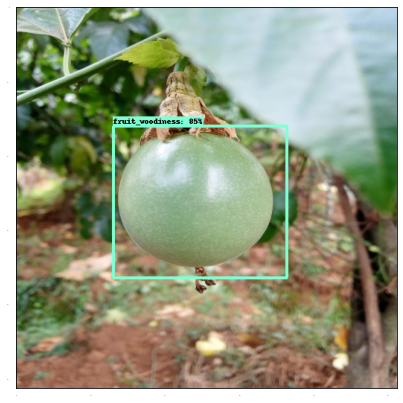

In [ ]:
# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(len(test_images_np)):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    plot_detections(
      test_images_np[i][0],
      detections['detection_boxes'][0].numpy(),
      detections['detection_classes'][0].numpy().astype(np.uint32)
      + label_id_offset,
      detections['detection_scores'][0].numpy(),
      category_index, figsize=(15, 20))
    results['boxes'].append(detections['detection_boxes'][0][0].numpy())
    results['scores'].append(detections['detection_scores'][0][0].numpy())

In [ ]:
# Note that the first frame will trigger tracing of the tf.function, which will
# take some time, after which inference should be fast.

label_id_offset = 1
results = {'boxes': [], 'scores': []}

for i in range(10):
    input_tensor = tf.convert_to_tensor(test_images_np[i], dtype=tf.float32)
    detections = detect(input_tensor)
    plt.subplot(2, 5, i+1)
    A=[]
    A.append(np.ndarray((1, 4), buffer=np.array([detections['detection_boxes'][0][i][0].numpy().astype(float),
                                                 detections['detection_boxes'][0][i][1].numpy().astype(float),
                                                 detections['detection_boxes'][0][i][2].numpy().astype(float),
                                                 detections['detection_boxes'][0][i][3].numpy().astype(float)]),
                        dtype=float))
    plot_detections(
      test_images_np[i][0],
      A[i],
      np.array([detections['detection_classes'][0][i].numpy().astype(np.uint32)], dtype=np.int32) 
      + label_id_offset,
      np.array([detections['detection_scores'][0][i].numpy()], dtype=np.float32),
      category_index)
    results['boxes'].append(detections['detection_boxes'][0][0].numpy())
    results['scores'].append(detections['detection_scores'][0][0].numpy())
plt.show()